Team Project: Group #10
Fraudulent transaction detection


# <div align="center"> Fraud Detection Amongst Credit Card Transactions </div>  
###### <div align="center"> Authors: Adeel Shah, Anasuya Ghosh, Daniel Henry, Qimei Huang, Viktoria Ganz </div>

## Introduction
With the continuous evolution of technology, worldwide commerce has adapted to leverage new methods as they became available. In 1950 after forgetting his wallet during a business dinner at a New York restaurant named "Cabin Grill", Frank McNamara came up with the idea to create the "Diners club card". This was essentially a charge card that worked on credit, users were able to make multiple purchases and pay off the total expense incurred at the end of each month. Fast forward to 2018 and there are now 41 billion general purpose credit cards in the hands of consumer in the United States accounting for $3.8 trillion USD of annual volume. This level of growth has presented card issuers with a unique issue they must face, picking the proverbial fraudulent needle out of the non-fraudulent haystack. How could credit card issuers identify and reject what is believed to be a fraudulent transaction when most transactions are not? This is the problem that will be explored within this notebook, we will be using and we will be applying common data science principals to develop an algorithm that can classify a transaction as fraudulent or not based on its attributes.



### About the data
The data set we are working with was sourced from <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Kaggle</a> and is a collection of transactions made in 2013 by European cardholders. These transactions took place over the course of 2 for a total of 284,807 trades, 492 of which are fraudulent. The data contains time, amount and classification of each transaction as well as 28 variables that have already undergone a PCA transformation, a description of these variables could not be shared to protect the confidentiality of the transactions.


### Goals
- Collect the and clean (if required) the data
- Perform primilinary inspection of the data
- Determine charatarists of each classfication
- Prepare data for classification
- Predict classification based on transaction data

### References: 
- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
- https://www.creditcards.com/credit-card-news/market-share-statistics.php
- https://www.creditcards.com/credit-card-news/history-of-credit-cards.php
- https://www.kaggle.com/mlg-ulb/creditcardfraud

### Preparing the notebook

In this notebook we use various standard Python libraries in order to inspect, analyize and classify the data. All of the required libraries are loaded here

In [26]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Gathering the Data

Github restricts file sizes to 100MB and the dataset we're working with is just under 1GB, for this reason within our reposity the data has been split into 7 seperate CSVs (around 20MB each). The expectation is that the user of this notebook has cloned the entire reposity and so the CSVs can be loaded with a simple "read_csv" command. Once loaded the CSVs are appended into a single dataframe "df"

In [39]:
df1 = pd.read_csv("cc01.csv")
df2 = pd.read_csv("cc02.csv")
df3 = pd.read_csv("cc03.csv")
df4 = pd.read_csv("cc04.csv")
df5 = pd.read_csv("cc05.csv")
df6 = pd.read_csv("cc06.csv")
df7 = pd.read_csv("cc07.csv")

df= df1.append(df2).append(df3).append(df4).append(df5).append(df6).append(df7)


### Initial inspection

In [44]:
#df.info()
#print(df)
d=df[['Time','Amount','Class']]

fraud = d['Class']>0
zero_transactions = d['Amount']<0.01
#print(fraud.info())
print(d[fraud].describe())
print(d[zero_transactions].describe())
#print(d[fraud & zero_transactions].info()

fraud_mean=d[fraud].mean()
fraud_stdev=d[fraud].std()
print(fraud_mean)
print (df.head())
#fraud_amount = fraud['Amount']
#np=fraud['Amount'].to_numpy()
#=np.array(fraud['Amount'])


                Time       Amount  Class
count     492.000000   492.000000  492.0
mean    80746.806911   122.211321    1.0
std     47835.365138   256.683288    0.0
min       406.000000     0.000000    1.0
25%     41241.500000     1.000000    1.0
50%     75568.500000     9.250000    1.0
75%    128483.000000   105.890000    1.0
max    170348.000000  2125.870000    1.0
                Time  Amount        Class
count    1825.000000  1825.0  1825.000000
mean    89370.688767     0.0     0.014795
std     48065.662780     0.0     0.120763
min       282.000000     0.0     0.000000
25%     47284.000000     0.0     0.000000
50%     83419.000000     0.0     0.000000
75%    131288.000000     0.0     0.000000
max    172759.000000     0.0     1.000000
Time      80746.806911
Amount      122.211321
Class         1.000000
dtype: float64
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0

In [43]:
allfraud = df[df.Class == 1]
allnonfraud = df[df.Class == 0]
z = np.abs(stats.zscore(allnonfraud.V1))
count = 0
for idx, score in enumerate(z):
    if score > 3:
        count += 1
        print (idx, score)
print(count)

164 3.16171201442705
290 3.0369418997938795
1156 3.2013100333773745
1630 5.777232109351172
2176 3.035263256354521
2462 6.309660514086911
2680 3.914639679683264
2790 5.590611987560768
2955 3.086696216161411
2961 3.217088351771551
3507 3.0667701535481586
3552 3.491936501688752
4233 4.126951926656193
4606 4.096148628540775
4774 3.013415364786227
4808 3.0345219012406495
5293 3.3233753893966496
5368 4.223676633425176
5422 4.529815796662481
5523 3.0300010390697834
5531 4.177304439533473
5532 4.469944215204409
5712 3.6122298766143937
5794 4.347851916127383
5885 4.715967689615862
6219 3.901085260293141
6456 3.0905844411380357
6489 3.0527747862357413
6610 4.758862852238869
6710 3.1999041876852243
6764 3.4094504394667116
6793 11.957183106875299
6881 3.946271251802403
6934 3.030282794172434
6945 3.3100735471171454
7055 3.822247714038907
7056 4.1033228494643135
7065 4.389875523298481
7079 4.676531296884531
7119 4.96328133360425
7153 3.134278802891656
7221 3.5927242987760075
7230 3.147857188363535


75000 3.1868152103302294
75001 3.2198306384194555
75002 3.2198306384194555
75167 4.9925463828827015
75511 4.189112285503922
75542 3.689268553644913
75619 3.3732124703604645
75693 5.444167226852917
75694 3.691224406663264
75773 3.287527318644907
76006 3.154163803963623
76067 8.695651435670285
76077 5.287021297138658
76089 9.832114632762249
76283 3.9779868591087975
76289 3.5372100375378244
76340 3.283940585422219
76388 3.1883677906249934
76456 3.3930252643485748
76493 13.130442416431054
76497 10.816344268076902
76519 11.501496422576087
76538 12.124633710739392
76550 12.25003883222933
76593 4.2585599986539036
76682 3.7749043875687933
76706 3.4097983886280816
76720 3.5831046135884965
76794 3.3606195359701547
76850 3.9715545104483114
76988 4.014075137882045
77050 8.273954738799764
77056 3.3426266599028613
77076 5.065309731156772
77142 3.9144709662404833
77161 6.470879962603666
77204 3.4725671268498313
77207 3.9970332551117034
77262 4.011516822132299
77329 5.172611750221647
77405 5.318436886

126398 3.364332536502544
126480 6.245363999040004
126513 3.4217206686229793
126608 5.318442882335841
126720 3.164698749927012
126801 6.539027316576028
126853 3.1118113303322747
126937 4.1968257997492
127076 3.9490175663065994
127081 3.481775444219068
127135 9.73574798184563
127677 6.966213800725378
127959 4.940157266578026
128142 3.33336516063229
128148 4.508546786237505
128171 3.007353708969151
128336 6.303219307044422
128345 4.835341381051943
128368 4.261008045554664
128369 4.261008045554664
128370 4.255015274733874
128371 4.255015274733874
128568 6.832857023492635
128727 3.046163545931872
128897 4.872146352934111
129010 4.480366895231697
129047 4.835499837529918
129056 5.300054954040548
129075 3.2711249499092614
129128 3.790390972161153
129216 5.160807271420911
129219 3.333717803000199
129347 4.774576053363905
129458 4.784030861236272
129664 3.131224117202142
129785 4.987690573862323
129914 3.4534103174241713
130150 3.621599340362802
130248 3.9099368872289406
130535 7.12665800220226

164333 3.212336115088276
164457 4.159472122741121
164538 3.7926432506333048
164661 5.32103536983178
164688 3.018610879154036
164984 3.783135184168141
165042 8.409055941054884
165224 7.217152299811105
165364 3.7628304232628937
165431 3.2980987723349546
165478 4.366941797743585
165482 4.846164288426334
165569 3.0953046710543517
166378 3.321423352296699
166748 3.4176281878565975
166928 5.17402454167293
166930 4.5628837879394935
166989 6.67347352193036
167099 5.204729172077488
167648 4.461604895005013
167653 5.014747439149941
167721 5.153524721216907
167890 5.951453341176546
167984 4.759955645975614
168042 14.628551310297373
168109 9.8000422065124
168196 6.189106117180719
168209 3.1496456182211303
168234 3.263720319852997
168357 4.015916293637689
168372 3.0957479554752982
168397 3.8611111350149514
168399 3.6207577914816227
168415 3.529826991982522
168435 3.190433914046887
168463 3.5730058088582264
168532 4.00910914654967
168617 3.9105438804566113
168780 5.107613073025056
168831 3.388206341

194514 7.490825687328286
194688 7.645814296590888
194693 3.9624699601434896
194814 3.3432875117821963
194818 7.090886783031479
194837 12.031159478297768
194857 5.65541419988737
195096 3.5509696288697588
195165 4.186672337843331
195203 3.0506551611920276
195306 7.753259915235793
195314 4.544436918628648
195336 8.174161596287657
195436 4.277403972725719
195439 7.158429968923797
195463 3.4958753476937154
195639 3.627100543787515
195712 4.848391494490578
195713 3.8334790008554958
195754 10.924610739272058
195760 3.0147695157695753
195769 3.305927324809034
195784 10.357900733006677
195906 8.537294532231481
196272 6.7483760930257
196287 4.066431388786304
196303 5.0624309176434314
196357 6.126390176884809
196614 3.0418763424353243
196623 3.3114039864478424
196808 4.229002115983895
197016 3.254035864062479
197044 5.962558902187334
197068 3.339897347584795
197069 3.1302169152820496
197095 3.7097624040851955
197239 4.835740342989929
197307 3.2761456507539783
197342 4.829378418336818
197352 3.259

225466 3.05245191414595
225536 3.595948660178871
225646 5.0895939627778475
225693 3.8847174296608737
225742 4.033138815373093
225817 4.173547325865085
225873 4.9598491502586635
225904 4.462849097896232
225939 4.2613163514486025
225986 3.4922612739649597
226083 3.7810915095807083
226184 4.092583273063014
226195 3.587018338994295
226196 3.587018338994295
226226 4.206743214145359
226237 5.376594198654689
226268 12.43062284889583
226275 5.73853419373116
226303 5.072687515055984
226333 4.6033273540907125
226471 4.483330345027532
226523 3.137910970623498
226565 11.49615217289125
226748 4.243322883613409
226874 6.09931785774949
226980 3.972445112846537
226992 9.336234663342259
227018 3.1709016828164747
227065 10.021866668025833
227073 3.089402013737337
227126 3.378663397868416
227219 3.8909790714187626
227504 11.162097778809445
227643 3.805365342772322
227741 7.108989273997592
227772 7.633694091997302
227885 3.095228544414983
227893 3.2392043230076073
228065 3.047837554201472
228108 5.8684851

281204 3.8697057403626567
281234 3.353581995294975
281239 3.5539153904017944
281241 4.052335067528375
281261 5.233400860553758
281327 3.8369840353895794
281416 3.874923877157087
281464 4.296998763979577
281539 4.591040355413629
281555 3.4913628480012786
281564 3.8730852807198817
281622 4.695038633785566
281677 3.4953219421066657
281678 3.7811583788352
281848 4.313526730011005
281867 4.606369547881137
281890 4.896201043901446
281901 4.724509903813385
281917 5.19567136636535
281951 5.493416006578276
281965 5.78505930728822
281975 6.0778587421457955
282004 6.370676992320746
282011 5.717289508490526
282039 6.660456612785494
282161 3.450416234571275
282248 5.019061521967415
282314 6.958296531775771
282344 7.250333845233499
282354 7.540173792860152
282363 3.0402622623247537
282371 7.83059476640012
282389 8.121029337128956
282411 8.411476359856598
282423 5.018044568831614
282427 4.686146084182209
282506 5.107568334957282
282602 5.312563336612608
282620 3.025349328310754
282647 3.6620308441907

### Data Analysis

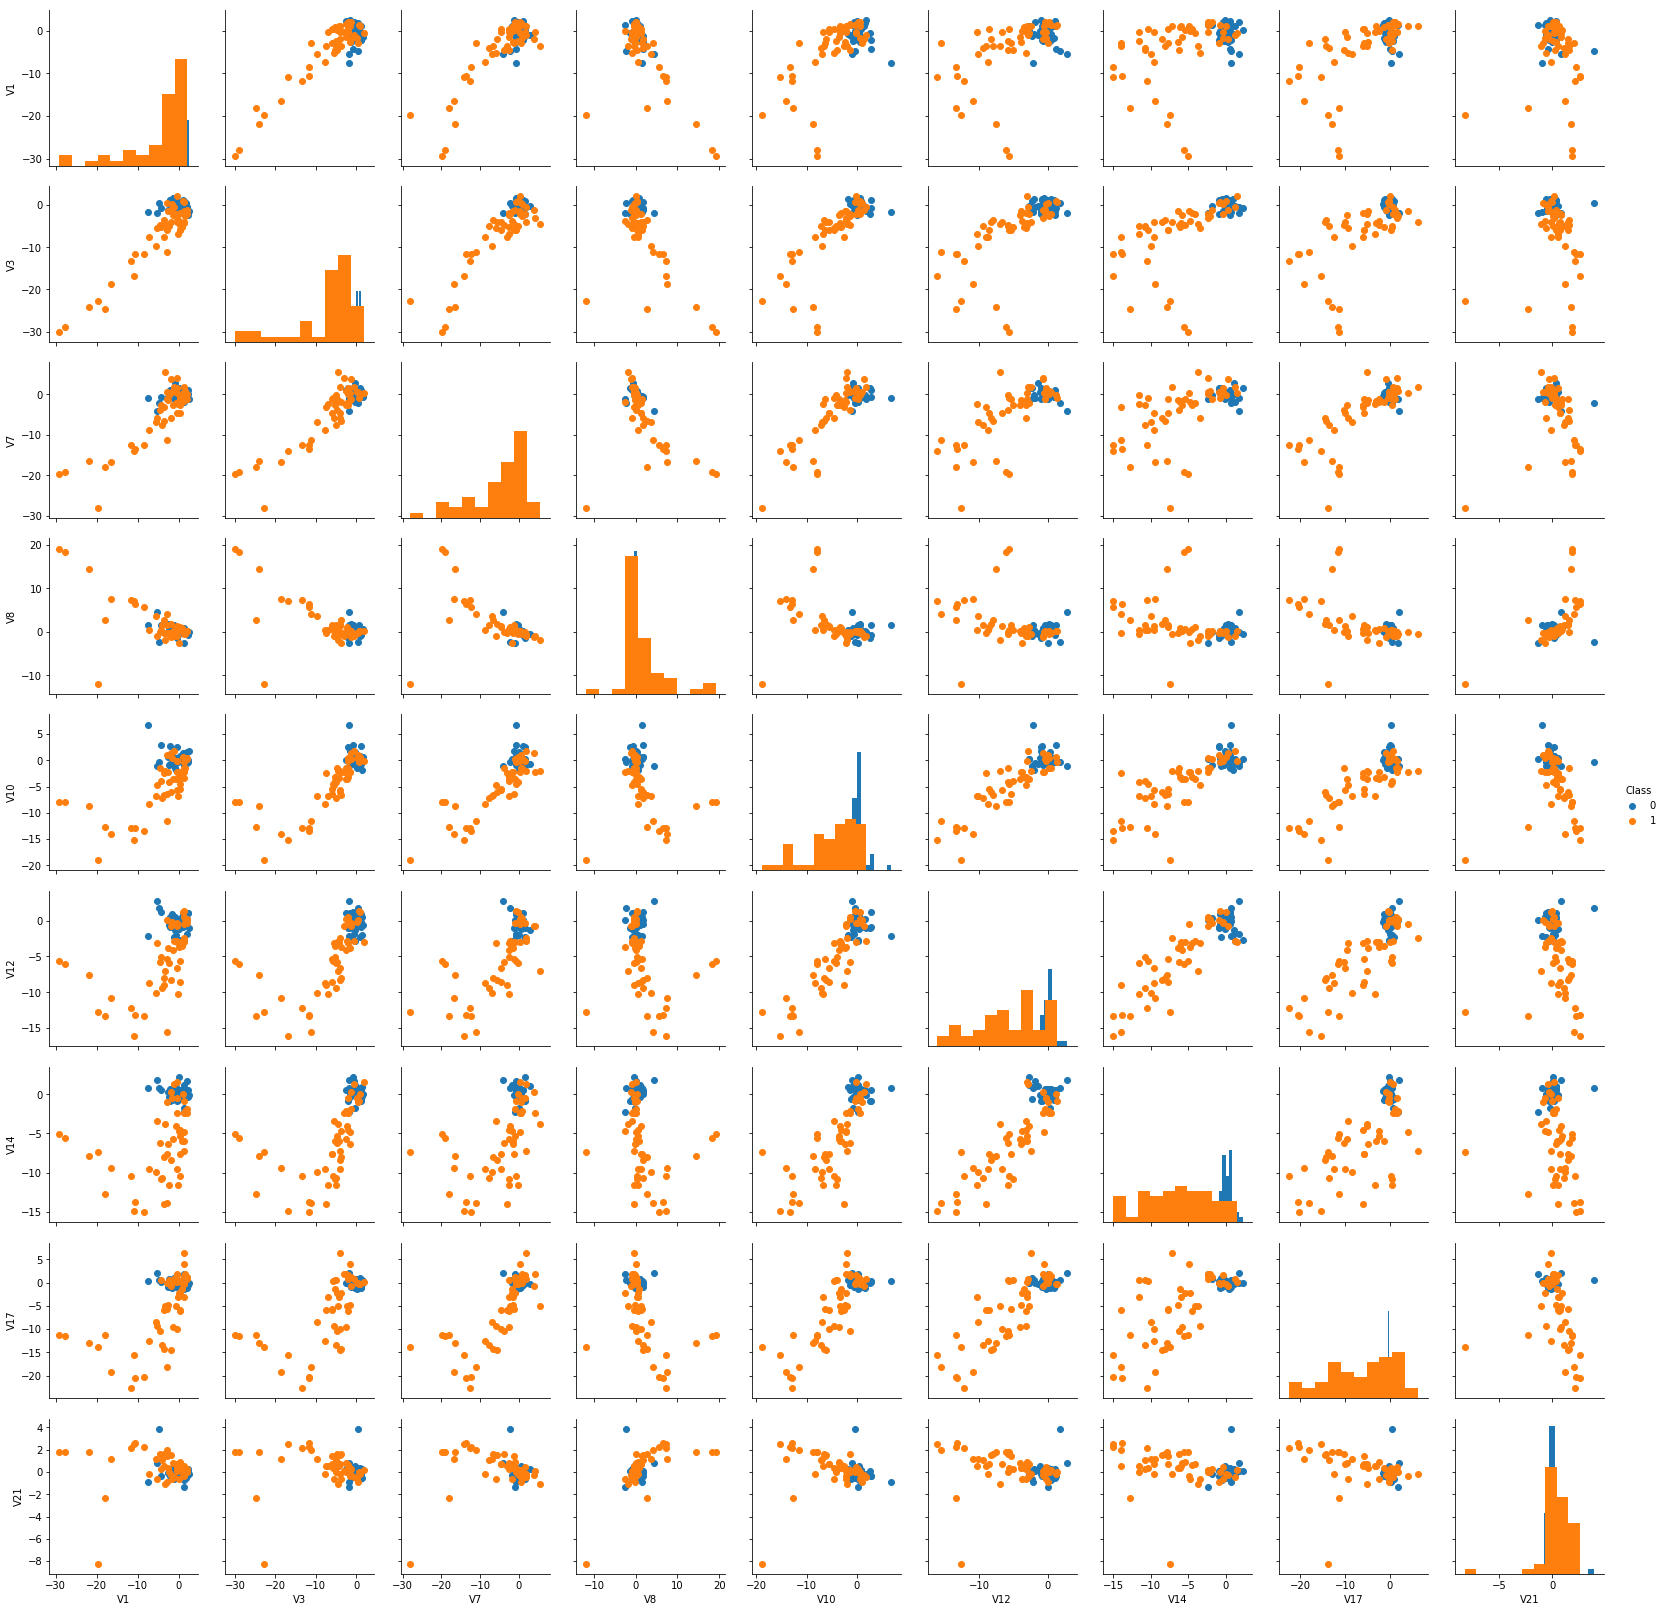

In [53]:
balancedset = pd.concat([allfraud.sample(n=50), allnonfraud.sample(n=50)])
grid = sns.PairGrid(balancedset, hue="Class", vars=["V1", "V3", "V7", "V8", "V10", "V12", "V14", "V17", "V21"])
grid.map_offdiag(plt.scatter)
grid.map_diag(plt.hist)
grid.add_legend();

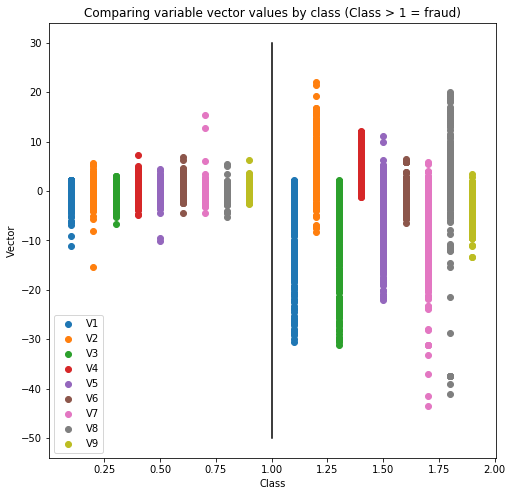

In [42]:
balancedset = pd.concat([allfraud, allnonfraud.sample(n=492)])
plt.figure(figsize=(8,8))
for idx, column in enumerate(balancedset.iloc[:, 1:10]):
    plt.scatter(balancedset.Class + (0.1 * idx) + 0.1, balancedset[column], label = column)
plt.plot([1, 1], [-50,30], 'k')
plt.xlabel('Class')
plt.ylabel('Vector')
plt.title('Comparing variable vector values by class (Class > 1 = fraud)')
plt.legend(loc='lower left')
plt.show()

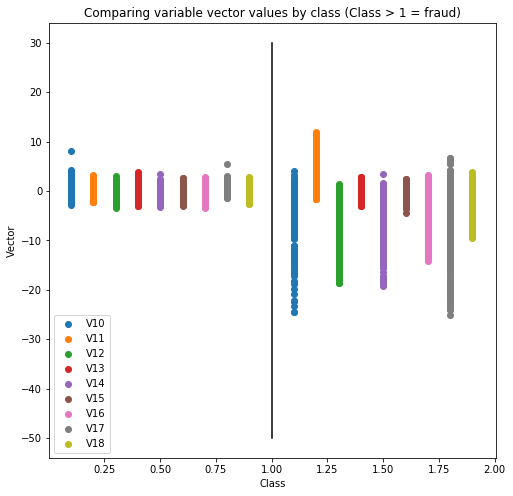

In [6]:
plt.figure(figsize=(8,8))
for idx, column in enumerate(balancedset.iloc[:, 10:19]):
    plt.scatter(balancedset.Class + (0.1 * idx) + 0.1, balancedset[column], label = column)
plt.plot([1, 1], [-50,30], 'k')
plt.xlabel('Class')
plt.ylabel('Vector')
plt.title('Comparing variable vector values by class (Class > 1 = fraud)')
plt.legend(loc='lower left')
plt.show()

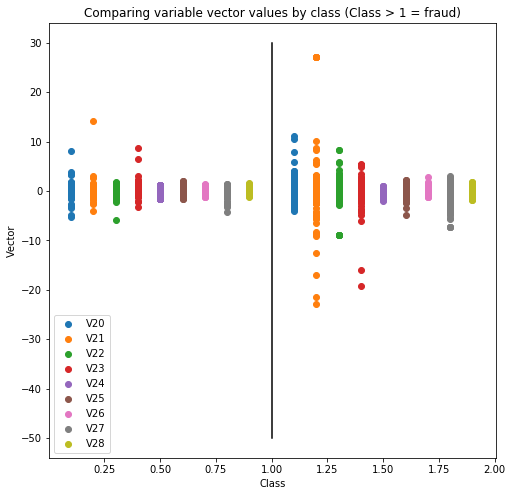

In [7]:
plt.figure(figsize=(8,8))
for idx, column in enumerate(balancedset.iloc[:, 20:29]):
    plt.scatter(balancedset.Class + (0.1 * idx) + 0.1, balancedset[column], label = column)
plt.plot([1, 1], [-50,30], 'k')
plt.xlabel('Class')
plt.ylabel('Vector')
plt.title('Comparing variable vector values by class (Class > 1 = fraud)')
plt.legend(loc='lower left')
plt.show()

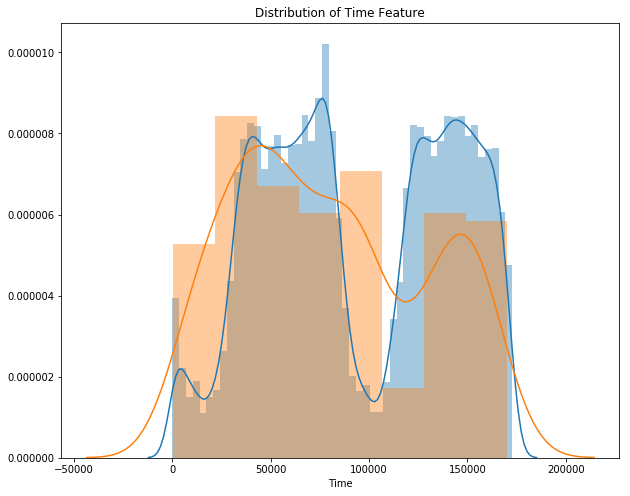

In [8]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(d.Time)
sns.distplot(d[fraud].Time)

In [12]:
print(len(df))

mask = np.random.rand(len(df))< 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

284807
Train Shape: (256100, 31)
Test Shape: (28707, 31)
There are 445 fraudulent transactions in the train data.


In [13]:
mask

array([ True,  True,  True, ...,  True,  True,  True])